In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

## Model definition 

In [2]:
model, solver = load_POMDP_file(file_name='./Example Models/4x4.95.POMDP')

In [3]:
model.convert_to_grid([
    ['s0', 's1', 's2', 's3'],
    ['s4', 's5', 's6', 's7'],
    ['s8', 's9', 's10', 's11'],
    ['s12', 's13', 's14', 's15']
    ])

In [4]:
model.end_states = [15]

## Solving

In [5]:
solver.eps = 10e-4

In [6]:
vf, history = solver.solve(model, 10,10)

Expansions:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 0:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 1:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 2:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 3:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 4:   0%|          | 0/10 [00:00<?, ?it/s]

Converged early...


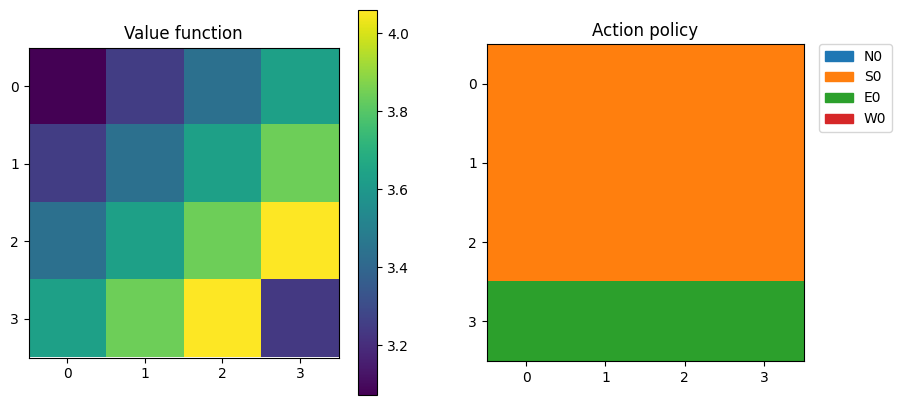

In [7]:
vf.plot()

## Simulation

In [8]:
a = Agent(model)
a.value_function = vf

In [9]:
sim_history = a.simulate(start_state=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulation done:
	- Runtime (s): 0.010523
	- Steps: 7
	- Total rewards: 1.0
	- End state: s15


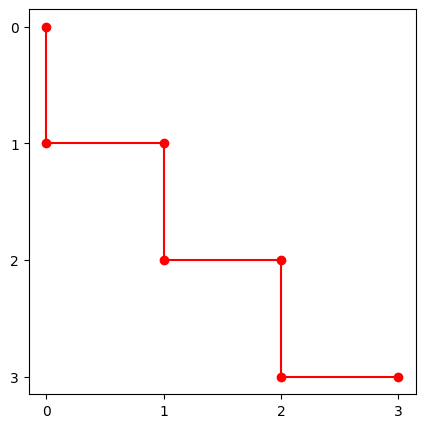

In [10]:
sim_history.plot_simulation_steps()

In [10]:
sim_history.save_simulation_video()

Video saved at 'Sim Videos/s16-a4-20230913_020937.mp4'...
